# Fourier transform
The idea of this transform is to eliminate low frequencies, caused due to movement of device

In [2]:
import pandas as pd
data_path = "../data/interim"
file = "808ab033-5ecb-464e-9468-f0dd985a7fd0-stage_1-3-aware.csv"

# file = "Data_808ab033-5ecb-464e-9468-f0dd985a7fd0_3_neja.json"
data = pd.read_csv(f"{data_path}/{file}", delimiter=',', index_col=0)
data

,X_AWARE,Y_AWARE,Z_AWARE,time_AWARE
0,-31.740000,-94.199997,-19.320000,1.669600e+12
1,14.639999,-12.120000,-25.559999,1.669600e+12
2,14.639999,-12.360000,-25.320000,1.669600e+12
3,14.639999,-12.900000,-25.320000,1.669600e+12
4,14.340000,-13.860000,-25.080000,1.669600e+12
...,...,...,...,...
173,14.340000,-8.099999,-26.519999,1.669600e+12
174,13.980000,-8.160000,-26.760000,1.669600e+12
175,14.340000,-8.280000,-26.160000,1.669600e+12
176,14.160000,-8.099999,-26.160000,1.669600e+12


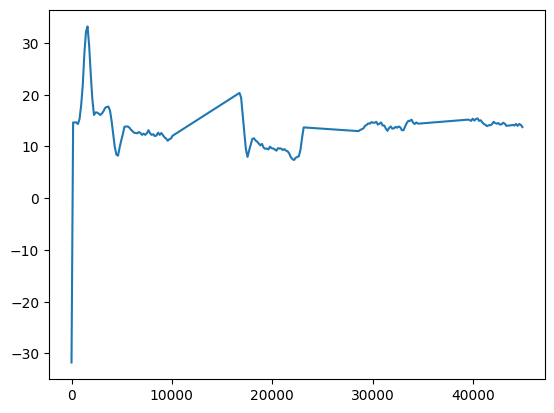

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# print(data['X_AWARE'].to_numpy())
x = data['time_AWARE'].to_numpy()
y = data['X_AWARE'].to_numpy()
x = x - x[0]
plt.plot(x, y)
plt.show()

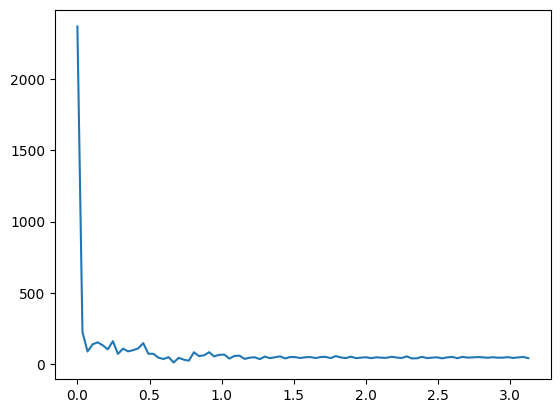

In [6]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq
yf = rfft(y)
# n of samples, spacing
xf = rfftfreq(len(x), (x[1] - x[0]) / 1000)
plt.plot(xf, np.abs(yf))
plt.show()


We can remove a couple lowest frequencies (movements of the phone)

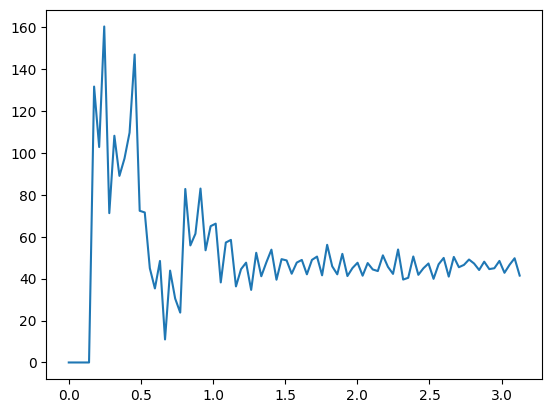

In [7]:
# remove lowest couple frequencies
target = 5
yf[:target] = 0
plt.plot(xf, np.abs(yf))
plt.show()

In [30]:
# now yf can be used as a vector for machine learning
yf

array([   0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
          0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
          0.        +0.00000000e+00j,  -55.38156323-1.19446297e+02j,
        -95.84623012-3.71822245e+01j, -155.70514481-3.82326248e+01j,
        -70.07403387+1.29451171e+01j, -106.0844254 -2.12235114e+01j,
        -89.04018085+5.07446792e-02j,  -96.17474451+1.50661690e+01j,
       -109.38907571+7.79632257e+00j,  -98.83370504+1.08742551e+02j,
        -22.59690764+6.87637992e+01j,  -29.13324324+6.53936302e+01j,
          5.16190664+4.46634528e+01j,   22.56955715-2.71762032e+01j,
        -48.2269961 +4.51628847e+00j,    3.85372927+1.02933593e+01j,
        -32.07708867-2.98616571e+01j,  -30.38446126+2.76355209e+00j,
          7.66336723-2.25292199e+01j,  -64.55953874-5.18332977e+01j,
        -54.02384044-1.41910228e+01j,  -50.22648012-3.53628876e+01j,
        -81.31228161-1.65893935e+01j,  -50.9848297 +1.63577918e+01j,
        -63.33163927-1.48371697e+0